# XGBoost primer

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/mauropazmino/Documents/Learning/Deep_learning_tensor/data/MIRS_temperature_vs_age_20241014.dat", sep="\t")

# Extract features and labels
X = np.asarray(df.iloc[:, 15:-1])
y = np.asarray(df.iloc[:,0])

In [3]:
# extract the wavenumbers for plots
wavenumbers = df.iloc[:, 15:-1].columns.astype(int)

In [ ]:
#|label: encoding

# encoding our labels. XGBoost only accepts values from 0 to n-1 classes

lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
#|label: xgboostmodel
from xgboost import XGBClassifier

#define our model
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
# train
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#|label: accuracy
# predict values
y_pred = clf.predict(X_test)

# accuracy
print(f'Accuracy of XGBoost is: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Accuracy of XGBoost is: 81.96%


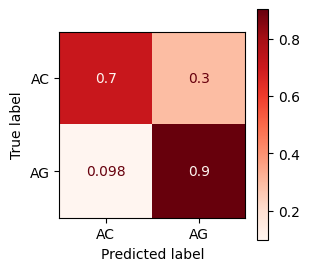

In [9]:
# confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(lb.inverse_transform(y_test), lb.inverse_transform(y_pred), normalize='true', cmap='Reds',ax=ax)

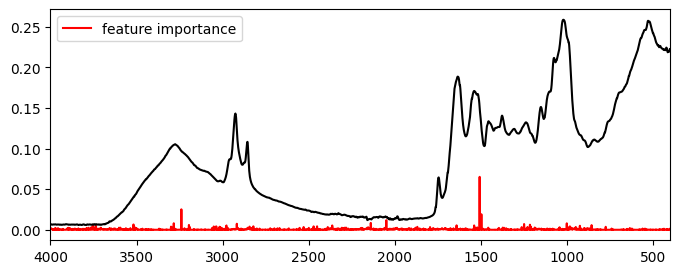

In [ ]:
#|label: featureimportance
# feature importance
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(wavenumbers, clf.feature_importances_, color='r', label='feature importance')
ax.plot(wavenumbers, X[1], color='k')
ax.set_xlim(4000, 400)
ax.legend()